In [1]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython import display

In [2]:
X1 = np.linspace(0,1,11)
X2 = np.flip(X1).copy()
a = np.array([[8.07131, 1730.63, 233.426],[7.43155, 1554.679, 240.337]])
p1sat = 10**(a[0,0]-(a[0,1]/(20 + a[0,2])))
p2sat = 10**(a[1,0]-(a[1,1]/(20 + a[1,2])))
p_label = np.array([[28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]])
p_label = torch.tensor(p_label, requires_grad = False, dtype = torch.float32)
x1 = torch.tensor(X1, requires_grad = False, dtype = torch.float32)
x2 = torch.tensor(X2, requires_grad = False, dtype = torch.float32)
A = Variable(torch.tensor([1.0, 1.0]), requires_grad = True)
a = 0.0001

for i in range (100):
    p_pred = x1*torch.exp(A[0]*(A[1]*x2/(A[0]*x1 + A[1]*x2))**2)*p1sat + x2*torch.exp(A[1]*(A[0]*x1/(A[0]*x1 + A[1]*x2))**2)*p2sat
    loss = (p_pred-p_label)**2
    loss = loss.sum()
    loss.backward()

    with torch.no_grad():
      A = A - a*A.grad
      A.grad.zero_()

print('estimation A12 and A21 is', A)
print('final loss is :', loss.data.numpy)

AttributeError: ignored

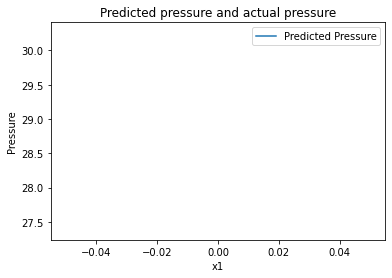

In [13]:
p_pred = p_pred.detach().numpy()[0]
p_label = p_label.detach().numpy()[0]
x1 = x1.detach().numpy()[]

plt.plot(x1, p_pred, label = "Predicted Pressure")
plt.xlabel('x1')
plt.ylabel('Pressure')
plt.legend()
plt.title('Predicted pressure and actual pressure')